In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=040bd02bd1fc30a6d64879a0811f132a947a076771c506cf0af63db7b06aaaf4
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
import pyspark
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName("Spark").getOrCreate()

In [ ]:

student=spark.read.csv("/content/students(1).csv",header=True)
student_rdd=spark.sparkContext.textFile("/content/students(1).csv")
student.show()

+------+--------------+---------------------------+------------+-----------------------+----------+-------------+-------------+
|gender|race/ethnicity|parental level of education|       lunch|test preparation course|math score|reading score|writing score|
+------+--------------+---------------------------+------------+-----------------------+----------+-------------+-------------+
|female|       group B|          bachelor's degree|    standard|                   none|        72|           72|           74|
|female|       group C|               some college|    standard|              completed|        69|           90|           88|
|female|       group B|            master's degree|    standard|                   none|        90|           95|           93|
|  male|       group A|         associate's degree|free/reduced|                   none|        47|           57|           44|
|  male|       group C|               some college|    standard|                   none|        76|     

In [ ]:
#1.Number of male and female students
gender_count=student.groupBy("gender").count()
gender_count.show()

+------+-----+
|gender|count|
+------+-----+
|female|  518|
|  male|  482|
+------+-----+



In [ ]:
#2.List different race/ethnicity
race=student.select("race/ethnicity").distinct()
race.show()


+--------------+
|race/ethnicity|
+--------------+
|       group B|
|       group C|
|       group D|
|       group A|
|       group E|
+--------------+



In [ ]:
#3.What are different parental level of education
parental_education=student.select("parental level of education").distinct()
parental_education.show()

+---------------------------+
|parental level of education|
+---------------------------+
|           some high school|
|         associate's degree|
|                high school|
|          bachelor's degree|
|            master's degree|
|               some college|
+---------------------------+



In [ ]:
#4.How many female students scored more than 79 marks in math, whose parental level of education is 'high school'
#parent_high_school=student.filter("parental level of education"=="high school")
from pyspark.sql.functions import col
female_students=student.filter(col("gender")=="female")
score_greater_79=female_students.filter(col("math score")>=79)
parental_education_high_school=score_greater_79.filter(col("parental level of education")=="high school")
parental_education_high_school.show()


+------+--------------+---------------------------+--------+-----------------------+----------+-------------+-------------+
|gender|race/ethnicity|parental level of education|   lunch|test preparation course|math score|reading score|writing score|
+------+--------------+---------------------------+--------+-----------------------+----------+-------------+-------------+
|female|       group B|                high school|standard|                   none|        87|           95|           86|
|female|       group E|                high school|standard|                   none|        99|           93|           90|
|female|       group D|                high school|standard|              completed|        88|           99|          100|
|female|       group B|                high school|standard|                   none|        81|           91|           89|
|female|       group C|                high school|standard|                   none|        81|           84|           82|
+------+

In [ ]:
#5.Check whether average maths score of male or female students are high?
from pyspark.sql.functions import avg
high_avg_marks_gender=student.groupBy("gender").agg(avg("math score").alias("Avg_math_score")).orderBy("Avg_math_score").first()[0]
high_avg_marks_gender


'female'

In [ ]:
#6.What is average reading score of male and female students?
avg_reading_score=student.groupBy("gender").agg(avg("reading score").alias("Avg_reading_score"))
avg_reading_score.show()


+------+-----------------+
|gender|Avg_reading_score|
+------+-----------------+
|female|72.60810810810811|
|  male|65.47302904564316|
+------+-----------------+



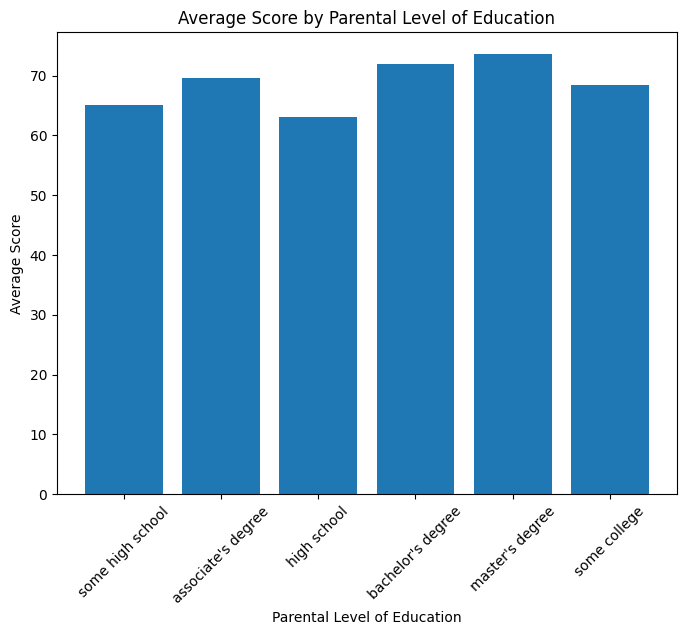

In [ ]:
#7.Whether students score depends upon 'parental level of education'? Justify your answer
import matplotlib.pyplot as plt
p_level_edu=student.select(col("parental level of education"),col("math score"),col("reading score"),col("writing score"))
p_level_edu=p_level_edu.withColumn("avg_score", (col("math score") + col("reading score") + col("writing score")) / 3)
p_level_edu=p_level_edu.drop(col("math score"),col("reading score"),col("writing score"))
edu_marks=p_level_edu.groupBy("parental level of education").agg(avg("avg_score").alias("avg_score")).toPandas()
plt.figure(figsize=(8, 6))
plt.bar(edu_marks["parental level of education"],edu_marks["avg_score"])
plt.xlabel("Parental Level of Education")
plt.ylabel("Average Score")
plt.title("Average Score by Parental Level of Education")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#List the records where 'test preparation course' is 'none' and scored more than 70 in maths.
test_prep_course_none=student.filter(col("test preparation course")=="none")
score_greater_70=test_prep_course_none.filter(col("math score")>70)
score_greater_70.show()


+------+--------------+---------------------------+------------+-----------------------+----------+-------------+-------------+
|gender|race/ethnicity|parental level of education|       lunch|test preparation course|math score|reading score|writing score|
+------+--------------+---------------------------+------------+-----------------------+----------+-------------+-------------+
|female|       group B|          bachelor's degree|    standard|                   none|        72|           72|           74|
|female|       group B|            master's degree|    standard|                   none|        90|           95|           93|
|  male|       group C|               some college|    standard|                   none|        76|           78|           75|
|female|       group B|         associate's degree|    standard|                   none|        71|           83|           78|
|  male|       group C|                high school|    standard|                   none|        88|     